<h2>Import thư viện

In [1]:
# Thư viện đọc file và chuyển kiểu
import pandas as pd
import numpy as np

# Đổi kiểu dữ liệu datetime
import datetime as dt

# Import các thư viện train
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import sklearn để tính toán các giá trị cũng như scaled dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Đọc dữ liệu

In [2]:
# Đọc dữ liệu từ file csv
df = pd.read_csv('./dataset/CTLT.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
1,2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2,2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
3,2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
4,2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
5,2019-01-09,32.790001,33.430000,32.730000,33.380001,33.380001,894400
6,2019-01-10,33.189999,33.970001,32.970001,33.880001,33.880001,748700
7,2019-01-11,33.830002,33.930000,33.570000,33.750000,33.750000,639800
8,2019-01-14,33.540001,33.689999,33.299999,33.590000,33.590000,779700
9,2019-01-15,33.720001,34.264999,33.520000,34.070000,34.070000,867700


In [3]:
# Chuyển đổi cột thuộc tính 'Date' về dạng DateTime
df['Date'] = pd.to_datetime(df['Date'])

# Chọn thuộc tính 'Date' làm Index
df.set_index('Date', inplace=True)

In [4]:
# Xem các dòng dữ liệu vừa được thêm vào
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...
2023-02-28,66.779999,68.839996,66.320000,68.220001,68.220001,1972100
2023-03-01,67.650002,69.480003,67.269997,69.010002,69.010002,1212300
2023-03-02,68.589996,71.245003,68.099998,71.190002,71.190002,1543600


<h2> Mô tả tập dữ liệu

In [5]:
# Các độ đo về các thuộc tính của tập dữ liệu
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1.051000e+03
mean,81.982483,83.170678,80.685379,81.960390,81.960390,1.256569e+06
std,29.849883,30.168000,29.429889,29.776183,29.776183,1.405532e+06
min,30.049999,30.660000,29.290001,29.840000,29.840000,2.197000e+05
25%,52.104999,52.975001,51.504999,52.209999,52.209999,6.938500e+05
50%,85.550003,86.879997,84.264999,85.349998,85.349998,9.543000e+05
75%,107.104999,108.739998,105.250000,107.065002,107.065002,1.378900e+06
max,142.639999,142.639999,140.779999,142.350006,142.350006,3.083880e+07


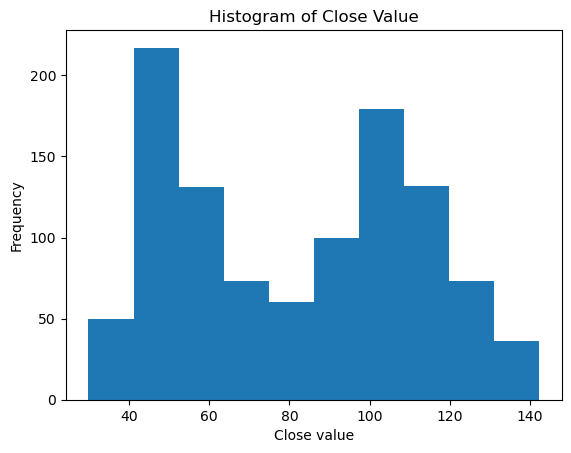

In [6]:
# Vẽ biểu đồ Histogram
plt.hist(df['Close'])

# Thiết lập label và title
plt.xlabel('Close value')
plt.ylabel('Frequency')
plt.title('Histogram of Close Value')

# Hiển thị biểu đồ histogram
plt.show()

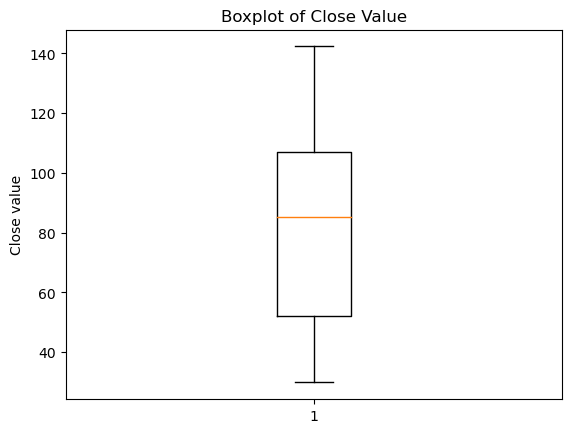

In [7]:
# Vẽ biểu đồ boxplot
plt.boxplot(df.Close)

# Thiết lập label và title
plt.title("Boxplot of Close Value")
plt.ylabel("Close value")

# Hiển thị biểu đồ box plot
plt.show()

<h2> Scale dữ liệu và phân chia các tập dữ liệu train, validation và test

In [8]:
#Lấy cột thuộc tính 'Close'
data = df['Close'].values

In [9]:
# Scale dữ liệu
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

In [10]:
# Chia dữ liệu thành tập train, validation và test theo tỉ lệ 7:2:1
train_size = int(len(data_scaled) * 0.7)
val_size = int(len(data_scaled) * 0.2)
test_size = len(data_scaled) - train_size - val_size

train_data = data_scaled[0 : train_size, :]
val_data = data_scaled[train_size : train_size + val_size, :]
test_data = data_scaled[train_size + val_size : len(data_scaled), :]

In [11]:
sequence_length = 30 #sử dụng 30 ngày trước đó để dự đoán ngày tiếp theo 

def add_data(data, sequence_length):
    X, Y = [], []
    for i in range(len(data) - sequence_length - 1):
        X.append(data[i : (i + sequence_length), :])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

# Thêm dữ liệu cho tập train, validation và test
X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data, sequence_length)
X_val, y_val = add_data(val_data, sequence_length)

<h2>Xây dựng mô hình


In [12]:
model = Sequential() #Đóng gói trình tự của các layer bên trong

#4 lớp LSTM
#Dropout: tránh việc nhớ quá nhiều thông tin => vô hiệu hóa một phần dữ liệu trước đó
model.add(LSTM(units = 50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#1 lớp Dense (dày đặc)
model.add(Dense(units=1)) #1: 1 đơn vị cung cấp giá trị dự đoán

#Tối ưu hóa mô hình bằng adam
model.compile(optimizer = 'adam',loss='mean_squared_error')

<h2>Huấn luyện mô hình

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=2)

Epoch 1/50
22/22 - 19s - loss: 0.0451 - val_loss: 0.0166 - 19s/epoch - 868ms/step
Epoch 2/50
22/22 - 2s - loss: 0.0091 - val_loss: 0.0062 - 2s/epoch - 111ms/step
Epoch 3/50
22/22 - 2s - loss: 0.0058 - val_loss: 0.0085 - 2s/epoch - 86ms/step
Epoch 4/50
22/22 - 2s - loss: 0.0055 - val_loss: 0.0082 - 2s/epoch - 75ms/step
Epoch 5/50
22/22 - 2s - loss: 0.0059 - val_loss: 0.0075 - 2s/epoch - 87ms/step
Epoch 6/50
22/22 - 2s - loss: 0.0047 - val_loss: 0.0091 - 2s/epoch - 98ms/step
Epoch 7/50
22/22 - 2s - loss: 0.0052 - val_loss: 0.0101 - 2s/epoch - 84ms/step
Epoch 8/50
22/22 - 2s - loss: 0.0052 - val_loss: 0.0106 - 2s/epoch - 84ms/step
Epoch 9/50
22/22 - 2s - loss: 0.0052 - val_loss: 0.0057 - 2s/epoch - 83ms/step
Epoch 10/50
22/22 - 2s - loss: 0.0050 - val_loss: 0.0086 - 2s/epoch - 92ms/step
Epoch 11/50
22/22 - 2s - loss: 0.0047 - val_loss: 0.0072 - 2s/epoch - 90ms/step
Epoch 12/50
22/22 - 2s - loss: 0.0044 - val_loss: 0.0105 - 2s/epoch - 91ms/step
Epoch 13/50
22/22 - 2s - loss: 0.0052 - val_l

<h2>Dự đoán CLose Price trên tập test và validation

In [14]:
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

6/6 [==============================] - 0s 37ms/step


<h2>Tính độ lỗi của mô hình

In [15]:
# Độ lỗi trên tập test
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAE on Test set: ", test_mae)
print(f"MAPE on Test set: ", test_mape)
print(f"MSE on Test set: ", test_mse)
print(f"RMSE on Test set: ", test_rmse)
print(f"MSLE on Test set: ", test_msle)

MAE on Test set:  0.03327643539465318
MAPE on Test set:  0.16368139851477861
MSE on Test set:  0.002009148337952561
RMSE on Test set:  0.04482352438120591
MSLE on Test set:  0.0012723670677894689


In [16]:
# Độ lỗi trên tập validation
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(y_val, y_pred_val)

print(f"MAE on Validation set: ", val_mae)
print(f"MAPE on Validation set: ", val_mape)
print(f"MSE on Validation set: ", val_mse)
print(f"RMSE on Validation set: ", val_rmse)
print(f"MSLE on Validation set: ", val_msle)

MAE on Validation set:  0.059096598023764456
MAPE on Validation set:  0.10101198716151075
MSE on Validation set:  0.005825351163136245
RMSE on Validation set:  0.07632398812389356
MSLE on Validation set:  0.002197444750639396


<h2>Dự đoán giá đóng cửa cho 30 ngày tiếp theo

In [17]:
# Lấy ngày cuối cùng từ vị trí hiện tại
last_date = df.index[-1]

# Thêm một ngày mới sau ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

# Tạo danh sách các chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Dự đoán giá đóng cửa cho 30 ngày tiếp theo
last_sequence_days = data[-sequence_length:].reshape(1, -1, 1)
y_next_30_days = []

for i in range(30):
    # Dự đoán giá đóng cửa của ngày kế tiếp
    next_day_pred = model.predict(last_sequence_days)
    
    # Lưu giá trị dự đoán
    y_next_30_days.append(next_day_pred[0][0])
    
    # Cập nhật thông tin về ngày kế tiếp
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)

1/1 [==============================] - 0s 35ms/step


In [18]:
# Hiển thị giá trị dự đoán
print(y_next_30_days)

[2.0526166, 2.0480795, 2.0402317, 2.0308597, 2.0205052, 2.009773, 1.9990561, 1.9884974, 1.9772979, 1.9639771, 1.946756, 1.9244359, 1.8961009, 1.8618705, 1.8226148, 1.7796967, 1.7346632, 1.6890804, 1.6443894, 1.6017627, 1.562124, 1.5259959, 1.4935454, 1.46467, 1.4390677, 1.4162954, 1.3959275, 1.3775389, 1.360846, 1.3459554]


In [19]:
# Chuyển hóa dữ liệu lại như cũ
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)
val_data = scaler.inverse_transform(val_data)

<h2>Trực quan hóa mô hình

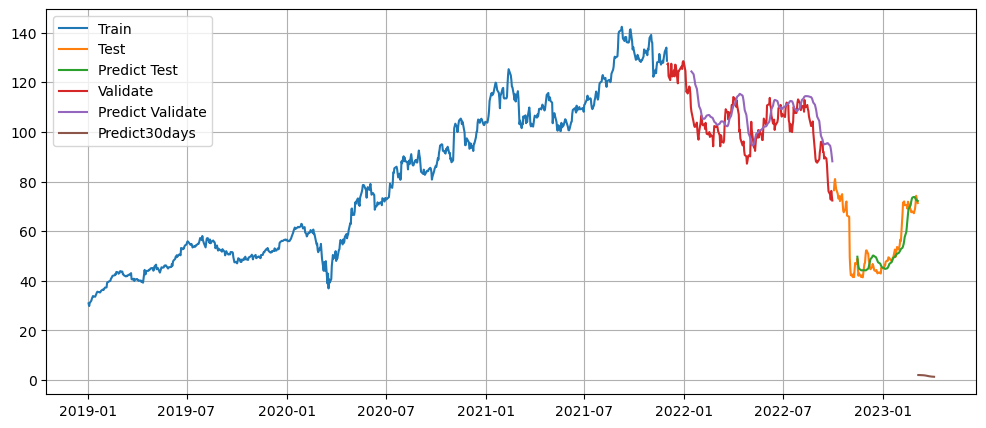

In [20]:
plt.figure(figsize=(12, 5))

# Tập train
plt.plot(df[:train_size].index, train_data)

# Tập test
plt.plot(df[train_size + val_size: ].index, test_data)

# Predict trên test
plt.plot(df[train_size + val_size + sequence_length + 1:].index, y_pred)

# Tập val
plt.plot(df[train_size : train_size + val_size].index, val_data)

# Predict trên tập Val
plt.plot(df[train_size + sequence_length + 1: train_size + val_size].index, y_pred_val)

# Dự đoán 30 ngày
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict Test','Validate',  'Predict Validate', 'Predict30days'])
plt.grid()
plt.savefig('IS403_RNN_CTLT.png')
plt.show()